In [1]:
train = pd.read_csv('../dataset/train.csv')

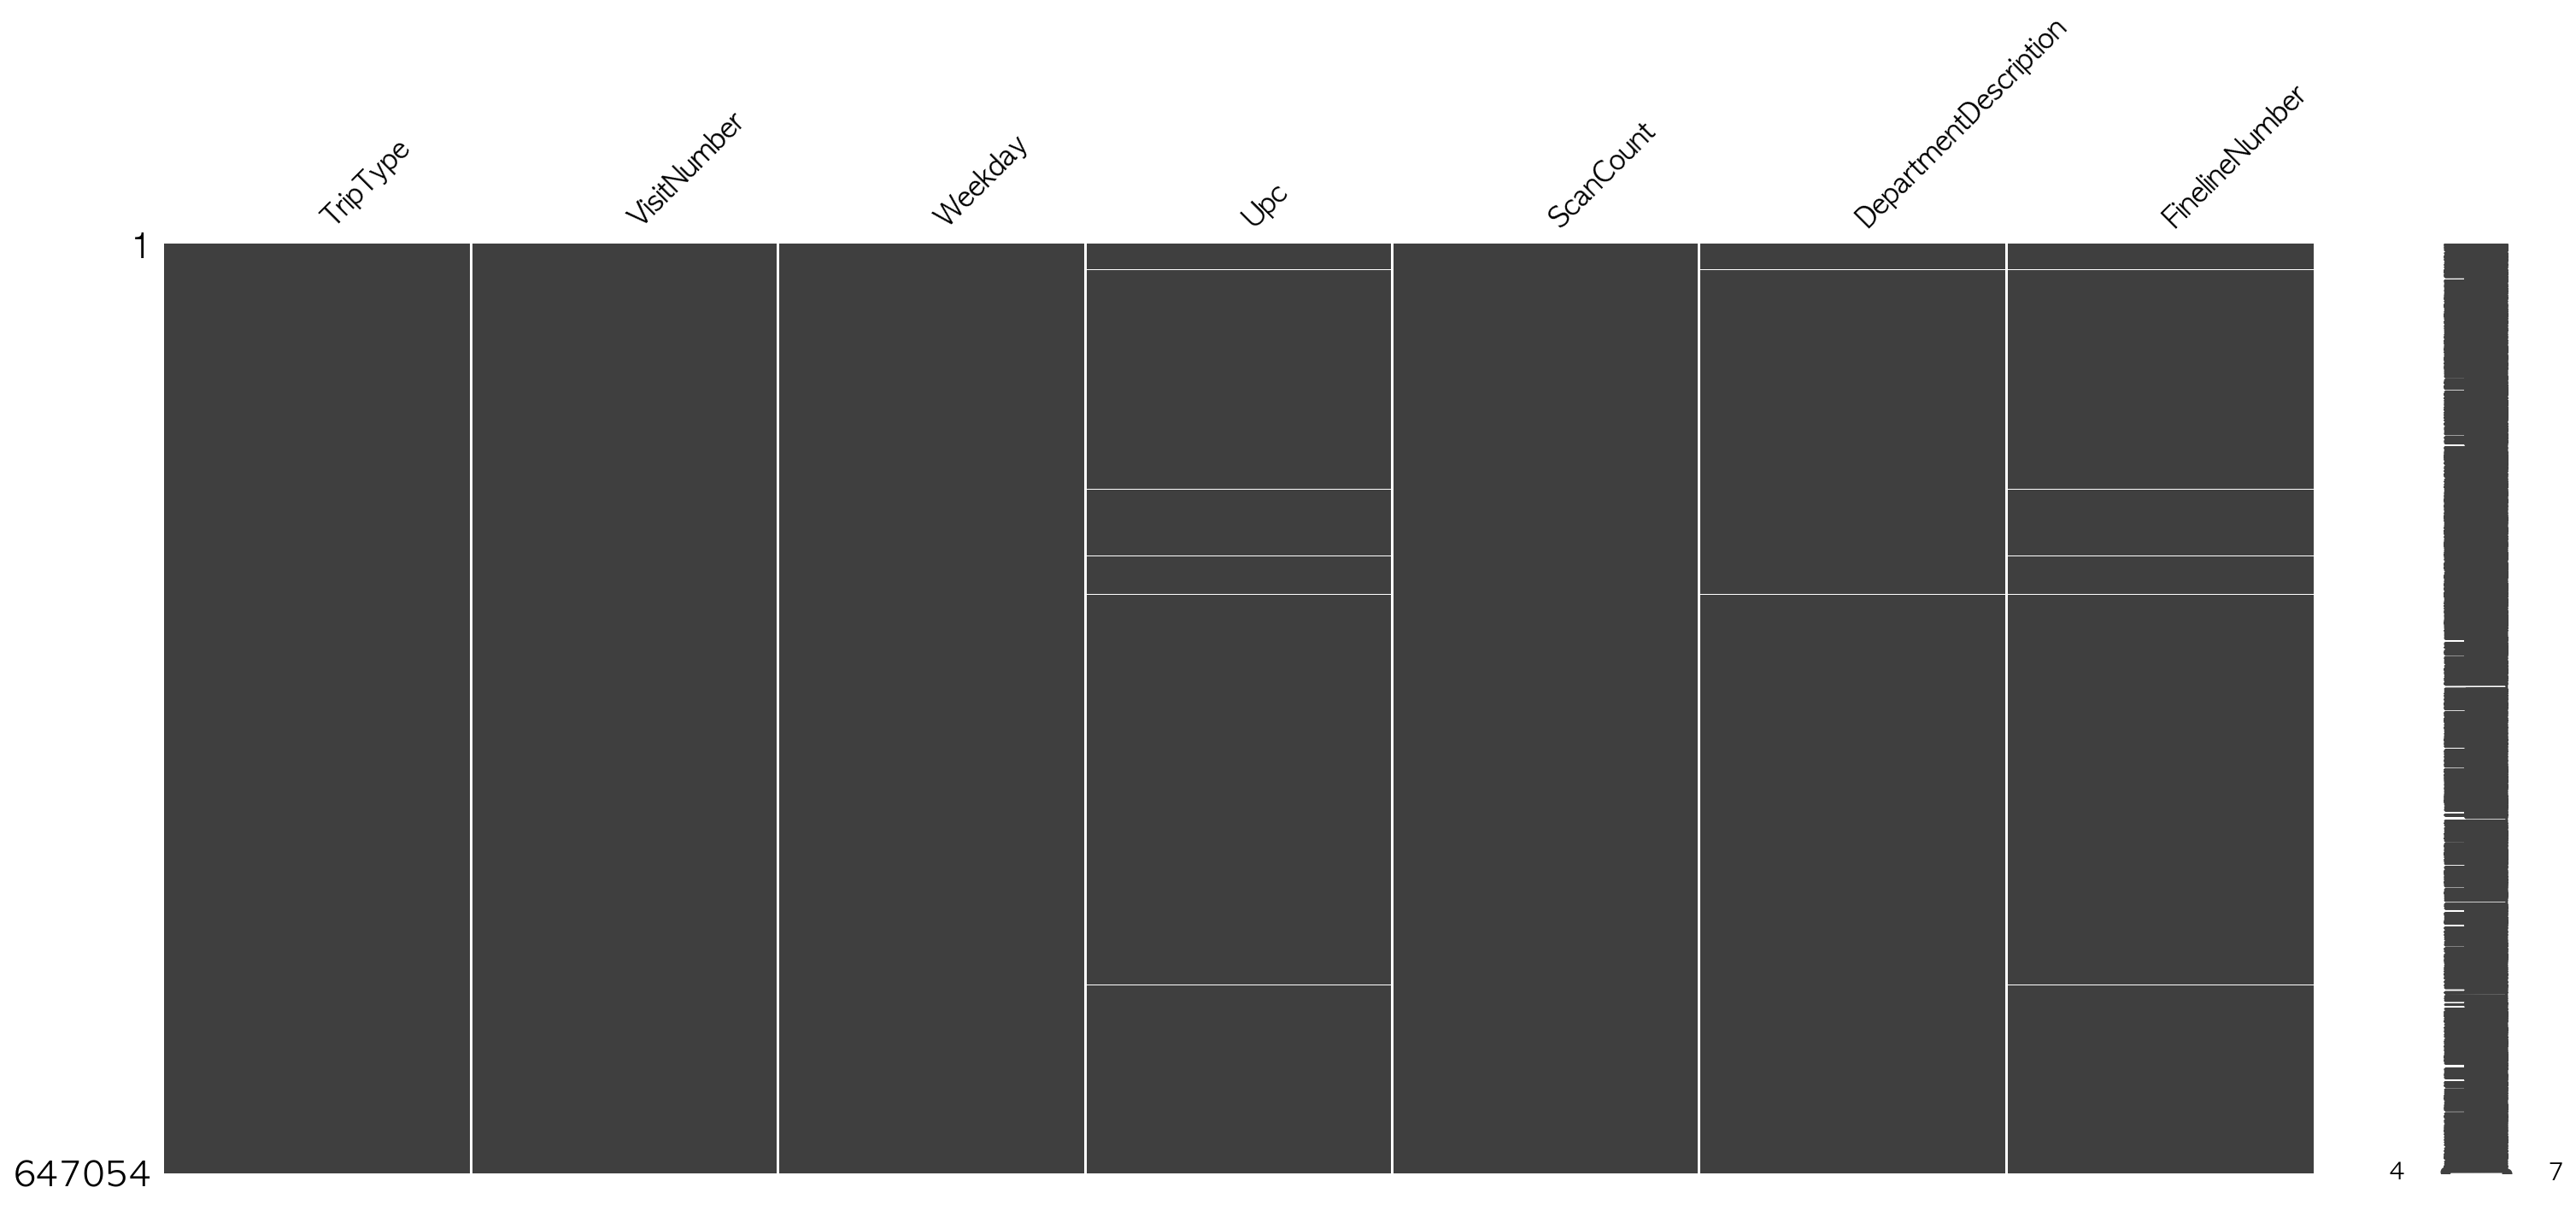

In [2]:
import missingno as msno
msno.matrix(train)

In [3]:
train.tail()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
647049,39,191346,Sunday,3.239000e+10,1,PHARMACY OTC,1118.0
647050,39,191346,Sunday,7.874205e+09,1,FROZEN FOODS,1752.0
647051,39,191346,Sunday,4.072000e+03,1,PRODUCE,4170.0
647052,8,191347,Sunday,4.190008e+09,1,DAIRY,1512.0
647053,8,191347,Sunday,3.800060e+09,1,GROCERY DRY GOODS,3600.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647054 entries, 0 to 647053
Data columns (total 7 columns):
TripType                 647054 non-null int64
VisitNumber              647054 non-null int64
Weekday                  647054 non-null object
Upc                      642925 non-null float64
ScanCount                647054 non-null int64
DepartmentDescription    645693 non-null object
FinelineNumber           642925 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 34.6+ MB


In [5]:
print("Missing Values in Upc:", train[train["Upc"].isnull()].shape[0])
train[train["Upc"].isnull()].head()

Missing Values in Upc: 4129


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
25,26,8,Friday,NaN,1,NaN,NaN
548,27,259,Friday,NaN,3,NaN,NaN
549,27,259,Friday,NaN,1,NaN,NaN
959,999,409,Friday,NaN,-1,NaN,NaN
1116,39,479,Friday,NaN,1,NaN,NaN


In [6]:
print("Missing Values in FinelineNumber:", train[train["FinelineNumber"].isnull()].shape[0])
train[train["FinelineNumber"].isnull()].head()

Missing Values in FinelineNumber: 4129


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
25,26,8,Friday,NaN,1,NaN,NaN
548,27,259,Friday,NaN,3,NaN,NaN
549,27,259,Friday,NaN,1,NaN,NaN
959,999,409,Friday,NaN,-1,NaN,NaN
1116,39,479,Friday,NaN,1,NaN,NaN


In [7]:
idx_upc = np.where(train["Upc"].isnull())[0]
idx_flnum = np.where(train["FinelineNumber"].isnull())[0]
print("idx_upc=idx_flnum:", np.any(idx_upc==idx_flnum))

idx_upc=idx_flnum: True


- Upc와 FinelineNumber의 Missing Value Index는 같음

In [8]:
print("Missing Values in DepartmentDescription:", train[train["DepartmentDescription"].isnull()].shape[0])
train[train["DepartmentDescription"].isnull()].head()

Missing Values in DepartmentDescription: 1361


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
25,26,8,Friday,NaN,1,NaN,NaN
548,27,259,Friday,NaN,3,NaN,NaN
549,27,259,Friday,NaN,1,NaN,NaN
959,999,409,Friday,NaN,-1,NaN,NaN
1116,39,479,Friday,NaN,1,NaN,NaN


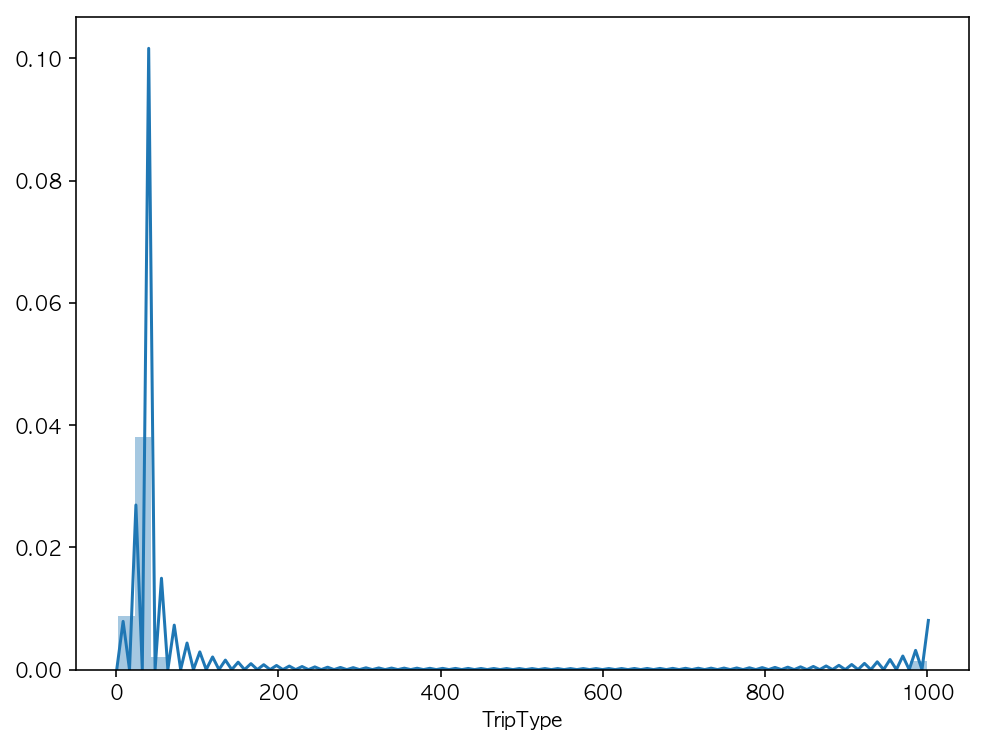

In [9]:
plt.figure(figsize=(8, 6))
sns.distplot(train.TripType)
plt.show()

In [10]:
wd = {
    "Monday": 0,
    "Tuesday": 1,
    "Wednesday": 2,
    "Thursday": 3, 
    "Friday": 4,
    "Saturday": 5,
    "Sunday": 6,
}
train["Weekday"] = train["Weekday"].apply(lambda x: wd[x])

In [11]:
train.tail()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
647049,39,191346,6,3.239000e+10,1,PHARMACY OTC,1118.0
647050,39,191346,6,7.874205e+09,1,FROZEN FOODS,1752.0
647051,39,191346,6,4.072000e+03,1,PRODUCE,4170.0
647052,8,191347,6,4.190008e+09,1,DAIRY,1512.0
647053,8,191347,6,3.800060e+09,1,GROCERY DRY GOODS,3600.0


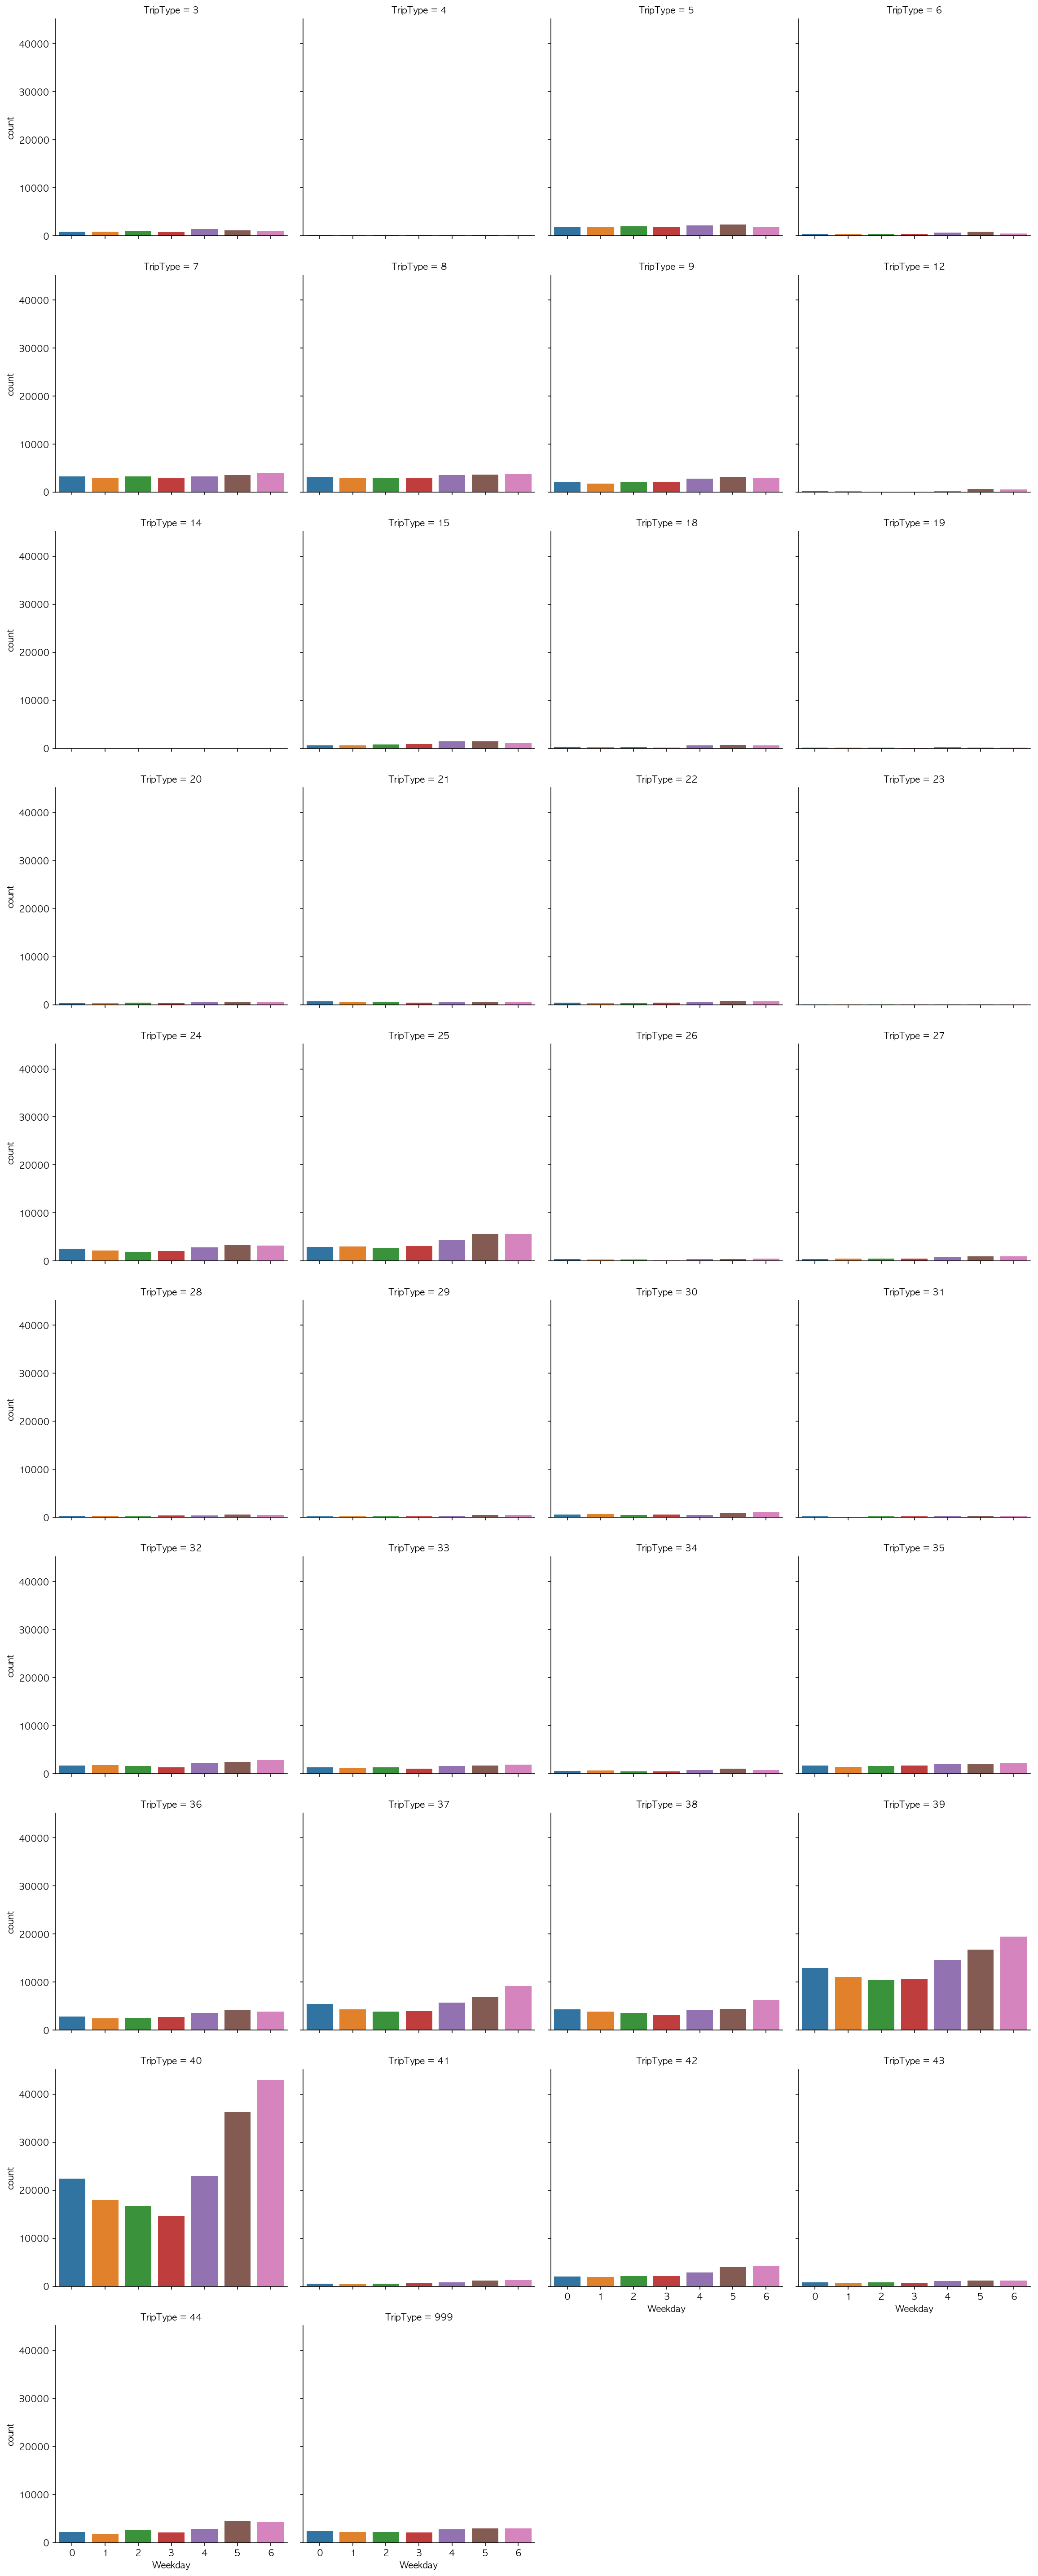

In [12]:
sns.factorplot(x="Weekday", col="TripType", col_wrap=4, data=train[train.notnull()], kind="count")
plt.show()

In [13]:
train["DepartmentDescription"].unique()

array(['FINANCIAL SERVICES', 'SHOES', 'PERSONAL CARE',
       'PAINT AND ACCESSORIES', 'DSD GROCERY', 'MEAT - FRESH & FROZEN',
       'DAIRY', 'PETS AND SUPPLIES', 'HOUSEHOLD CHEMICALS/SUPP', nan,
       'IMPULSE MERCHANDISE', 'PRODUCE', 'CANDY, TOBACCO, COOKIES',
       'GROCERY DRY GOODS', 'BOYS WEAR', 'FABRICS AND CRAFTS',
       'JEWELRY AND SUNGLASSES', 'MENS WEAR', 'ACCESSORIES',
       'HOME MANAGEMENT', 'FROZEN FOODS', 'SERVICE DELI',
       'INFANT CONSUMABLE HARDLINES', 'PRE PACKED DELI', 'COOK AND DINE',
       'PHARMACY OTC', 'LADIESWEAR', 'COMM BREAD', 'BAKERY',
       'HOUSEHOLD PAPER GOODS', 'CELEBRATION', 'HARDWARE', 'BEAUTY',
       'AUTOMOTIVE', 'BOOKS AND MAGAZINES', 'SEAFOOD', 'OFFICE SUPPLIES',
       'LAWN AND GARDEN', 'SHEER HOSIERY', 'WIRELESS', 'BEDDING',
       'BATH AND SHOWER', 'HORTICULTURE AND ACCESS', 'HOME DECOR', 'TOYS',
       'INFANT APPAREL', 'LADIES SOCKS', 'PLUS AND MATERNITY',
       'ELECTRONICS', 'GIRLS WEAR, 4-6X  AND 7-14', 'BRAS & SHAPEWEAR',

In [72]:
train["DepartmentDescription"].value_counts()

GROCERY DRY GOODS              70402
DSD GROCERY                    68332
PRODUCE                        51115
DAIRY                          43820
PERSONAL CARE                  41969
IMPULSE MERCHANDISE            28712
HOUSEHOLD CHEMICALS/SUPP       24880
PHARMACY OTC                   23306
FROZEN FOODS                   21101
HOUSEHOLD PAPER GOODS          16274
COMM BREAD                     15244
BEAUTY                         14865
MENS WEAR                      12250
FINANCIAL SERVICES             10723
INFANT CONSUMABLE HARDLINES    10646
SERVICE DELI                   10127
CANDY, TOBACCO, COOKIES         9808
PETS AND SUPPLIES               9761
MEAT - FRESH & FROZEN           9477
PRE PACKED DELI                 9052
LADIESWEAR                      8721
CELEBRATION                     8698
COOK AND DINE                   7600
BAKERY                          7168
OFFICE SUPPLIES                 6578
HOME MANAGEMENT                 6349
TOYS                            6107
S

In [14]:
departments_train = pd.crosstab(train.index, [train.DepartmentDescription])
departments_train.tail()

DepartmentDescription,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
row_0,,,,,,,,,,,,,,,,,,,,,
647049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
647050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
647051,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
647052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
647053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
trainDept_df = train.join(departments_train)

In [16]:
trainDept_df = trainDept_df.drop(["VisitNumber", "Weekday", "Upc", "ScanCount",
                                  "DepartmentDescription", "FinelineNumber"], axis=1)

In [17]:
trainDept_df.head()

,TripType,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
sns.factorplot(x="TripType", col="DepartmentDescription", col_wrap=3, 
               data=train[train.notnull()], kind="count", size=7, orient="h")
plt.show()

In [19]:
train.columns

Index(['TripType', 'VisitNumber', 'Weekday', 'Upc', 'ScanCount',
       'DepartmentDescription', 'FinelineNumber'],
      dtype='object')

In [42]:
train["Upc"].unique().shape

(97715,)

In [43]:
train["FinelineNumber"].unique().shape

(5196,)

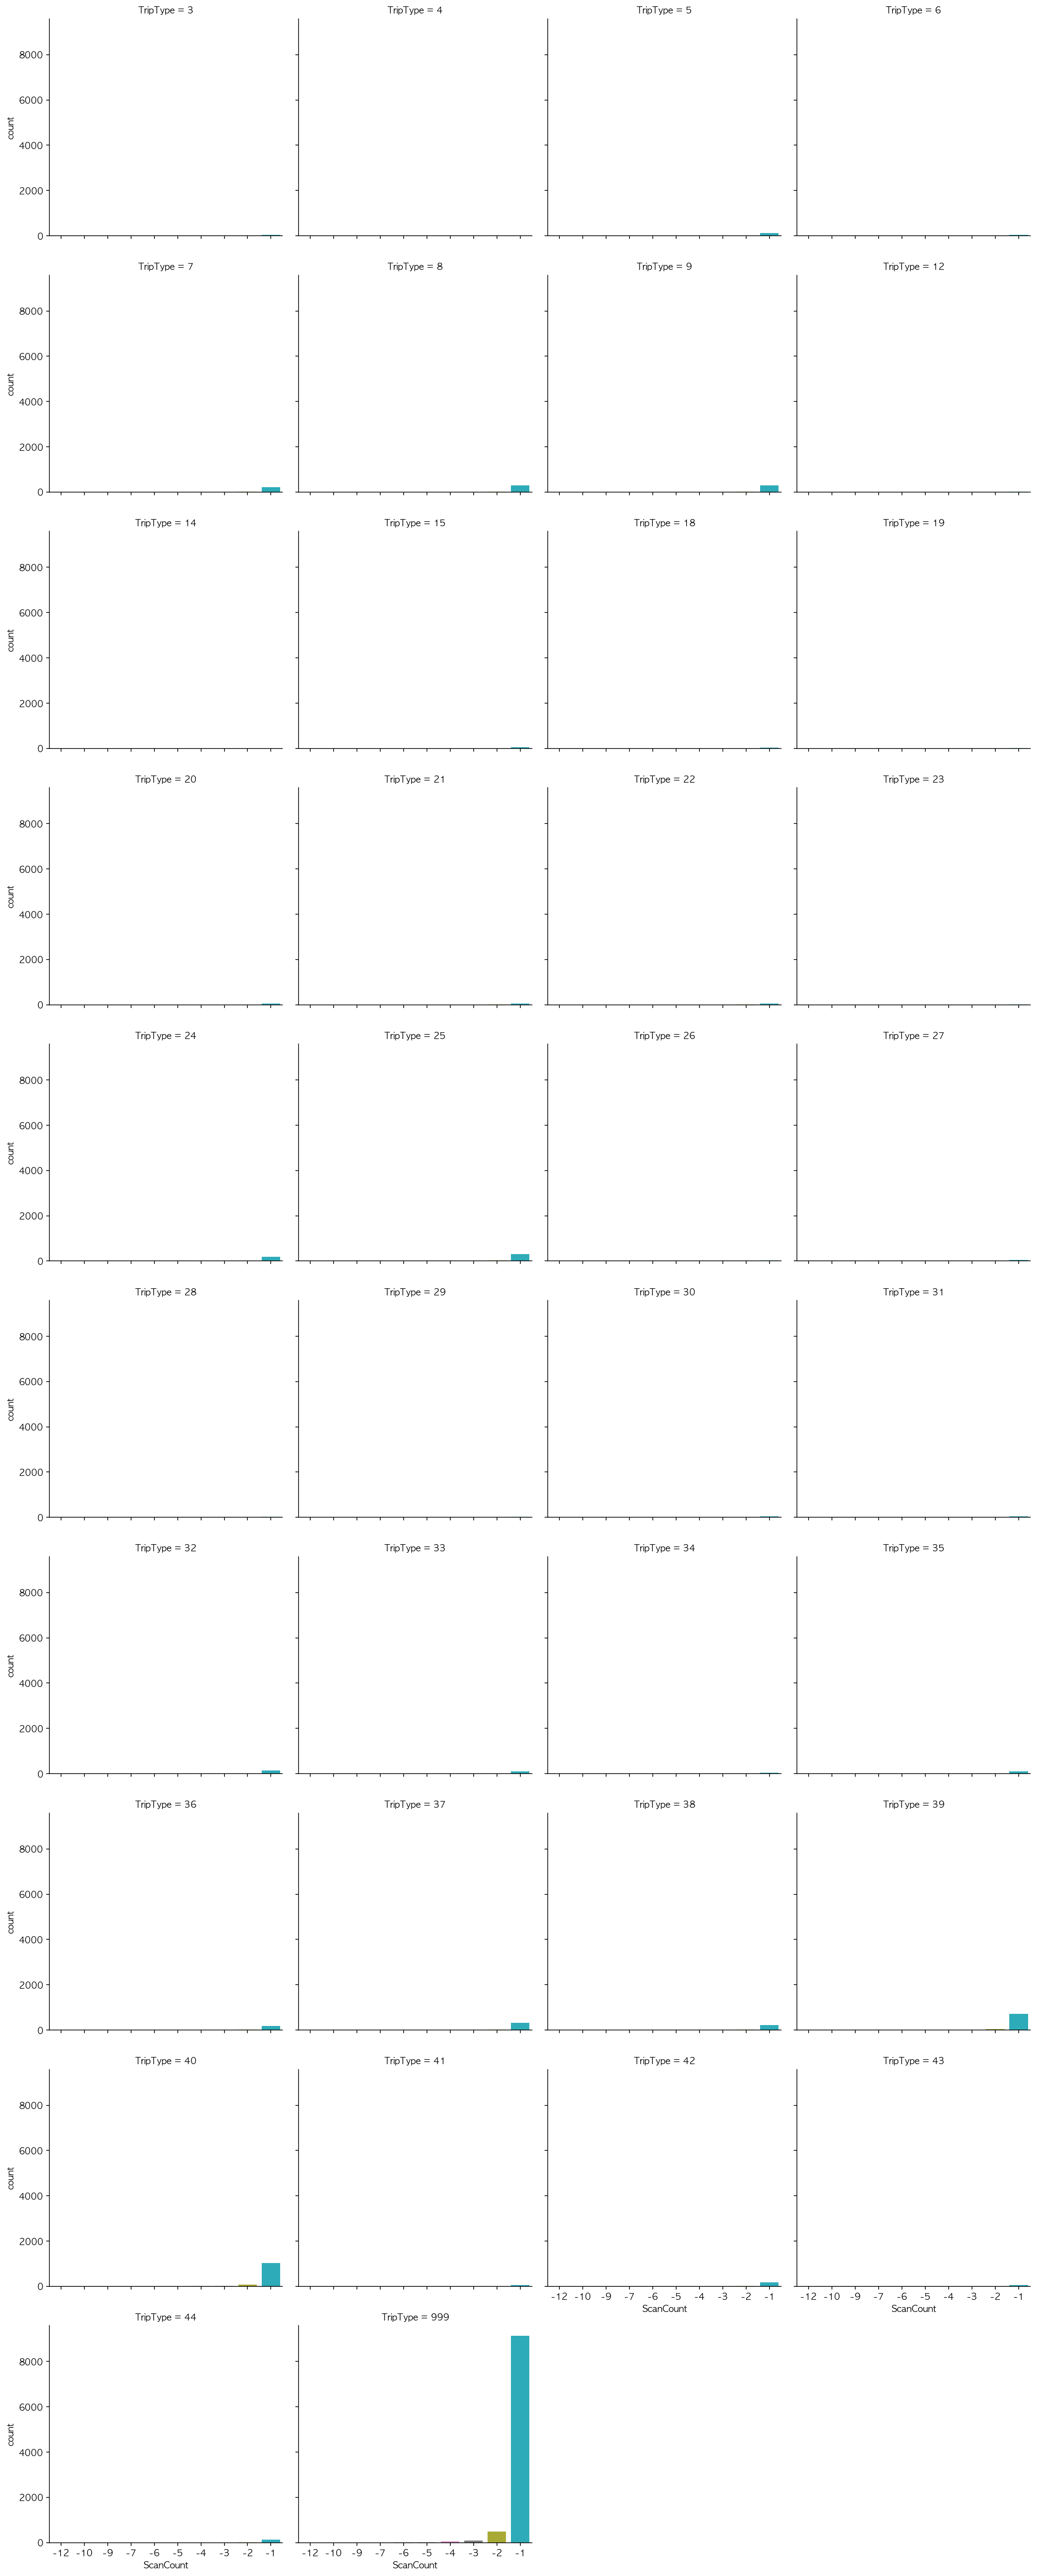

In [58]:
sns.factorplot(x="ScanCount", col="TripType", col_wrap=4, 
               data=train[train[train.notnull()]["ScanCount"]<0], kind="count")
plt.show()

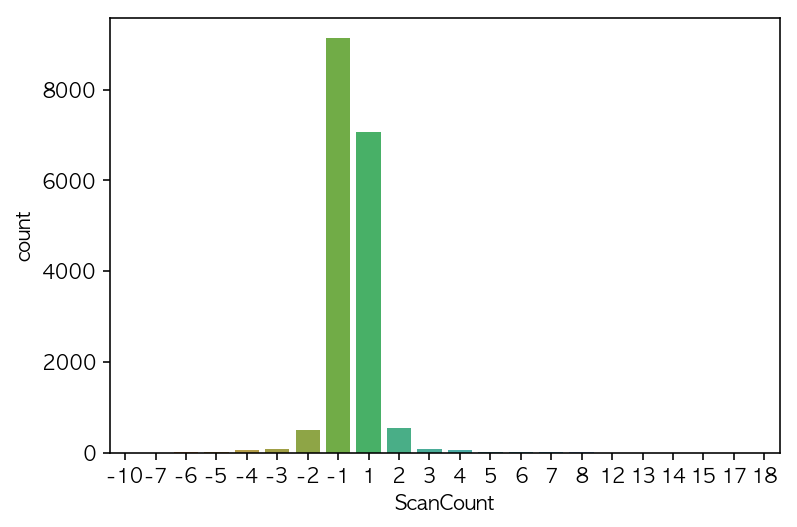

In [71]:
sns.countplot(x="ScanCount", data=train[train["TripType"]==999])

- 1개 반품은 클래스999이 거의 상당부분 차지함
- 클래스999에서는 1개 반품이 1개 구매보다 많이 나타남

In [99]:
train_notnull = train[train.notnull()]
train_notnull_selc = train_notnull[["ScanCount", "DepartmentDescription", "Weekday"]]
train_notnull_selc["Weekday"] = train_notnull_selc["Weekday"].astype(str)

/Users/sunwoongkim/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [100]:
X = pd.get_dummies(train_notnull_selc).values
y = train_notnull["TripType"].values

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [102]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
model = rf.fit(X_train, y_train)

In [103]:
model.score(X_test, y_test)

0.352723720976237

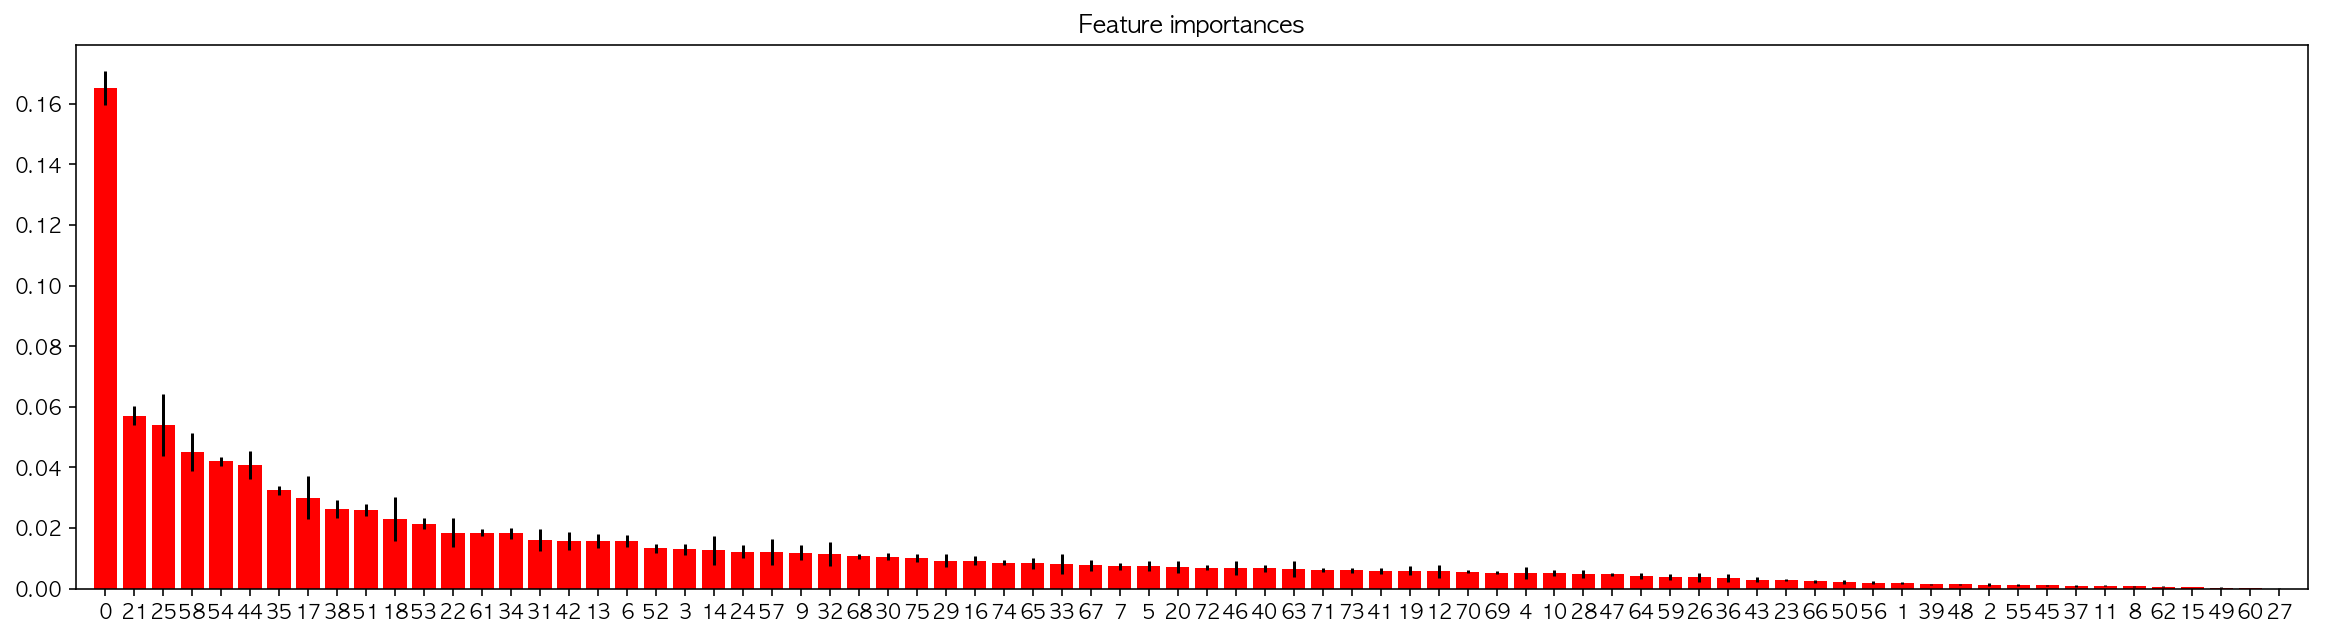

In [104]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(20, 5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()